In [0]:
!pip3 install fastai

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl && pip install torchvision

In [0]:
!mkdir data && wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: tr-TR,tr;q=0.9,en-US;q=0.8,en;q=0.7" "https://storage.googleapis.com/kaggle-datasets/10449/44567/10-monkey-species.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1533042295&Signature=blqhu3Z1FXX8wGptwWrGubiXJ4MR7zulXUMH5C7D5gEXb8wydmzGj5b7rdnbhYcS2Vg5xFf3fDQ9cnUFfDN2d5CLoEQj8FIO%2FrM0nJvjdRSZXrS65kht9Xp281tn578tE9rS9a%2BLrCoEW7Ba%2F%2BtyEvSH8cRMsV7hS9q%2F3Halb47bgVfZOPwEJV7n3fceRCuVnHSfiwH9t84TYfHOi1uvinr1nI9UsTjaJseC9661TSNQLgzpyclRzQmaiCv%2FmCuE7GJfvdbX%2B0btnFFc0m1JuQVi1HWISNok1JXJzUzDxBYNy35Y0NKEQmDeelxu6gyjnGAesVwIvqgGPCKo6L5Xxg%3D%3D" -O "10-monkey-species.zip" -c && unzip 10-monkey-species.zip -d data/ && unzip 10-monkey-species.zip/training.zip data/ && unzip 10-monkey-species.zip/validation.zip data/

In [13]:
!ls data

monkey_labels.txt  training  training.zip  validation  validation.zip


In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
PATH = "data/"
sz = 224

In [4]:
!ls {PATH}
!ls {PATH}validation | head

monkey_labels.txt  training  training.zip  validation  validation.zip
n0
n1
n2
n3
n4
n5
n6
n7
n8
n9


In [7]:
files = !ls {PATH}validation/n0
files

['n000.jpg',
 'n0010.jpg',
 'n0011.jpg',
 'n0012.jpg',
 'n0013.jpg',
 'n0014.jpg',
 'n0015.jpg',
 'n0016.jpg',
 'n0017.jpg',
 'n001.jpg',
 'n002.jpg',
 'n003.jpg',
 'n004.jpg',
 'n005.jpg',
 'n006.jpg',
 'n007.jpg',
 'n008.jpg',
 'n009.jpg',
 'n010.jpg',
 'n011.jpg',
 'n012.jpg',
 'n013.jpg',
 'n014.jpg',
 'n015.jpg',
 'n016.jpg',
 'n017.jpg']

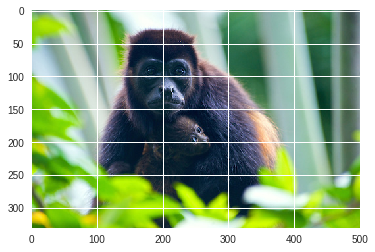

In [8]:
img = plt.imread(f'{PATH}validation/n0/{files[0]}')
plt.imshow(img)

In [9]:
img.shape
img[:4,:4]

array([[[108, 164, 119],
        [109, 162, 120],
        [108, 161, 119],
        [111, 159, 121]],

       [[113, 169, 120],
        [111, 167, 118],
        [112, 166, 117],
        [112, 164, 118]],

       [[116, 173, 118],
        [115, 172, 117],
        [115, 170, 113],
        [113, 168, 113]],

       [[117, 175, 114],
        [116, 175, 111],
        [114, 173, 109],
        [114, 170, 107]]], dtype=uint8)

In [0]:
!rm -rf {PATH}tmp

In [13]:
arch = resnet34
data = ImageClassifierData.from_paths(PATH,tfms = tfms_from_model(arch, sz), trn_name="training", val_name="validation")
learn = ConvLearner.pretrained(arch, data, precompute = True)
learn.fit(0.01, 3)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 31482653.64it/s]


  0%|          | 0/18 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


epoch      trn_loss   val_loss   accuracy   
    0      1.326735   0.230627   0.959559  
    1      0.649554   0.068078   0.988971  
    2      0.401702   0.052835   0.988971  



[0.05283548288485583, 0.9889705882352942]

In [14]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [15]:
data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [16]:
log_preds = learn.predict()
log_preds.shape

(272, 10)

In [17]:
log_preds[:10]

array([[ -0.00694,  -8.14021,  -7.04072,  -6.58708,  -8.89529,  -6.42689, -10.13503,  -7.67944,  -8.19604,
         -6.29786],
       [ -0.0079 ,  -7.76126,  -5.81636,  -6.44028,  -8.08229,  -8.12499,  -9.40691,  -8.547  ,  -8.81931,
         -6.29927],
       [ -0.02115,  -7.27914,  -7.28301,  -5.53119,  -8.70136,  -6.03692, -11.06401,  -9.72173,  -8.51802,
         -4.36128],
       [ -0.00174, -12.7449 ,  -8.00674, -14.5218 , -12.31286, -11.4371 , -14.94863, -14.12876,  -8.12176,
         -6.819  ],
       [ -0.33437,  -1.6109 ,  -4.62116,  -4.46136,  -6.24751,  -4.20968,  -6.62231,  -4.17634,  -5.68526,
         -3.64013],
       [ -0.05984,  -4.6365 ,  -3.58856,  -6.72477,  -6.78502,  -6.21641,  -8.13595,  -7.26234,  -5.26903,
         -4.57755],
       [ -0.18134,  -3.28908,  -5.17213,  -5.17022,  -4.17356,  -3.1052 ,  -4.43119,  -5.60956,  -5.14445,
         -3.33561],
       [ -0.0039 , -10.54012,  -6.63541, -10.52322,  -9.17416,  -8.49232, -10.86567,  -9.89592,  -8.40026,
    

In [0]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y) == is_correct)

In [0]:
def plot_val_with_title(idxs, title):
  imgs = np.stack([data.val_ds[x][0] for x in idxs])
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
  f = plt.figure(figsize=figsize)
  for i in range(len(ims)):
    sp = f.add_subplot(rows, len(ims)//rows, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
  imgs = [load_img_id(data.val_ds, x) for x in idxs]
  title_probs = [probs[x] for x in idxs]
  print(title)
  return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly Classified


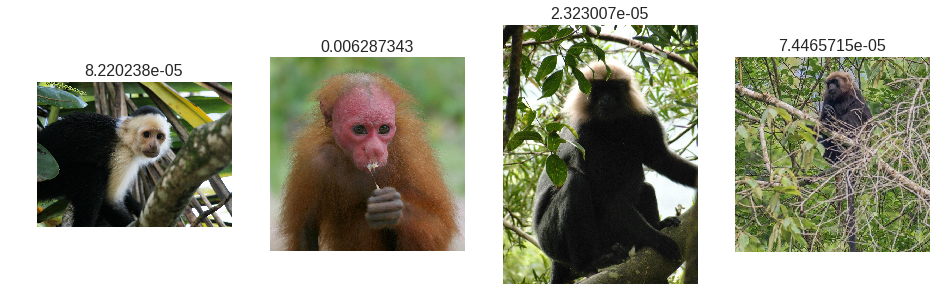

In [23]:
plot_val_with_title(rand_by_correct(True), 'Correctly Classified')

In [0]:
def most_by_mask(mask, mult):
  idxs = np.where(mask)[0]
  return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct):
  mult = -1 if(y==1) == is_correct else 1
  return most_by_mask((preds == data.val_y) == is_correct & (data.val_y == y), mult)

Most Correct Cats


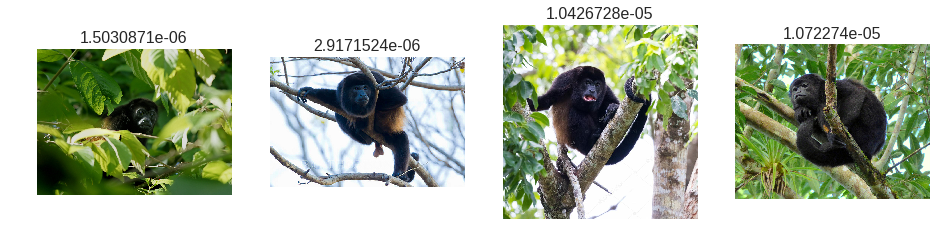

In [26]:
plot_val_with_title(most_by_correct(0, True), 'Most Correct Monkey')

Most Incorrect Cats


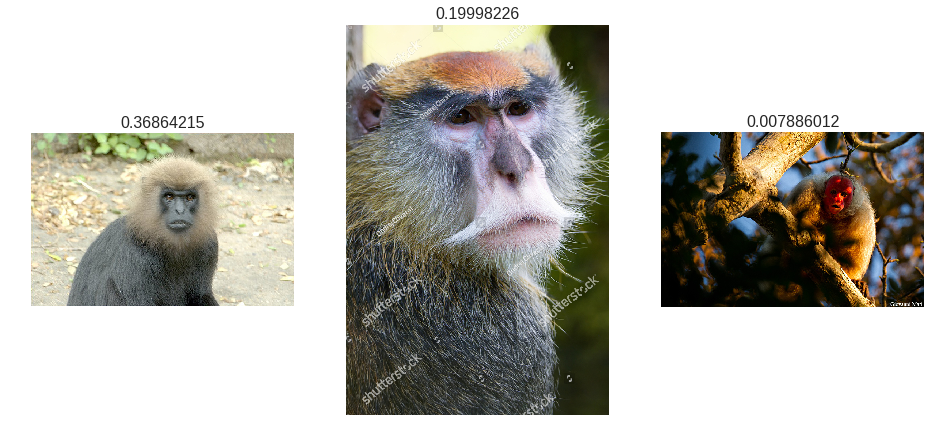

In [28]:
plot_val_with_title(most_by_correct(0, False), 'Most Incorrect Monkey')

Most Uncertain Predictions


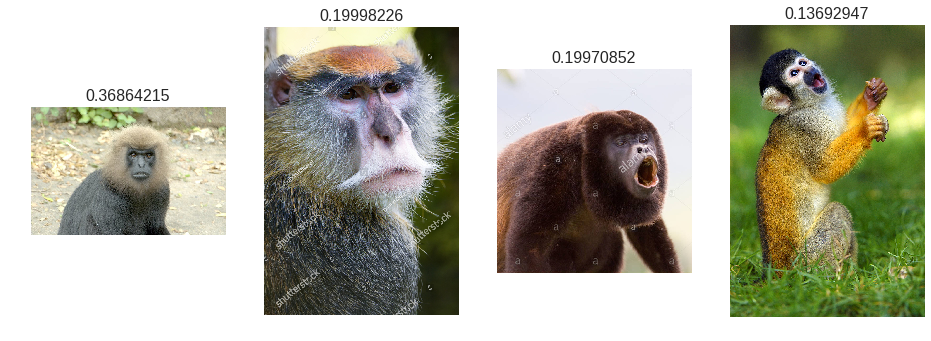

In [30]:
most_uncertain = np.argsort(np.abs(probs - 0.5))[:4]
plot_val_with_title(most_uncertain, 'Most Uncertain Predictions')

In [31]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms = transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
  data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1, trn_name="training", val_name="validation")
  x,_ = next(iter(data.aug_dl))
  return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

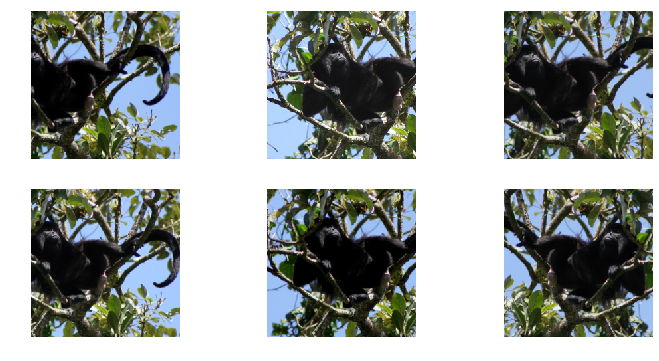

In [40]:
plots(ims, rows=2)

In [42]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, trn_name="training", val_name="validation")
learn = ConvLearner.pretrained(arch, data, precompute=True)

/usr/local/lib/python3.6/dist-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [43]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      1.276564   0.251032   0.977941  



[0.2510317038087284, 0.9779411764705882]

In [0]:
learn.precompute = False

In [45]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.331897   0.177203   0.981618  
    1      0.265536   0.120665   0.981618  
    2      0.229127   0.092834   0.981618  



[0.09283378106706283, 0.9816176470588235]

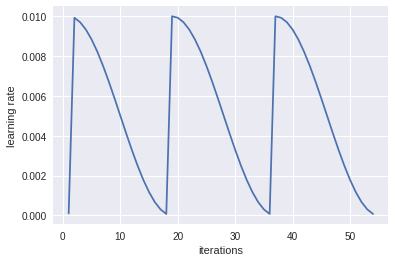

In [46]:
learn.sched.plot_lr()

In [0]:
learn.unfreeze()

In [0]:
lr = np.array([1e-4,1e-3,1e-2])

In [49]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.363369   0.109479   0.981618  
    1      0.270377   0.074868   0.981618  
    2      0.215281   0.06913    0.985294  
    3      0.19035    0.048077   0.992647  
    4      0.158782   0.03735    0.996324  
    5      0.125124   0.034199   0.996324  
    6      0.106733   0.031788   1.0       



[0.03178781095673056, 1.0]

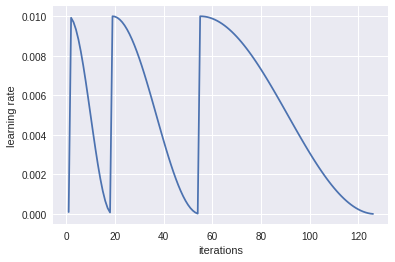

In [50]:
learn.sched.plot_lr()